In [1]:
#20/05/24
# Import Libraries

In [ ]:
# read_csv, columns,index,values,describe,info,head,tail,sample
# How to find len of diff datatypes - select_dtypes
# null values - df.isnull().sum()
# # If the variance or the standard deviation of the column is 0, then we can delete that column
# Delete the year column
# dropna, normalize, df['churn'].unique, df.nunique,df['churn'].value_counts()
# # Checking for duplicates - df.duplicated()
# Check for duplicate row(s) using a column - Use subset, df1[df1.duplicated(subset=['customer_id'])]
# if there is duplicate row is present # We delete the duplicate rows - df1.drop_duplicates()
# Unique value analysis # By performing unique value analysis, we can understand if the column is categorical or not1
# # Find all column unique value count - df1.nunique(), find particular col unique values - df1['gender'].unique()
# u want unique value along with the count and percentage -  df1['gender'].value_counts(dropna=False, normalize=True)*100
# annotate, countplot, piechart, displot
# finding Null values - df2.isnull().sum(), Handle Null/Missing values - df2.fillna({})
# Outlier detection, # Outlier Handling
# Encoding
# co-relation - corr

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Read the file
df = pd.read_csv("customer_churn_data.csv")
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [4]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [21]:
len(df.columns)

16

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [23]:
df.shape

(2000, 16)

In [15]:
# How to find len of diff datatypes
df.select_dtypes(include=int)

,year,customer_id,age,no_of_days_subscribed,weekly_max_night_mins,videos_watched,customer_support_calls
0,2015,100198,36,62,82,1,1
1,2015,100643,39,149,87,3,2
2,2015,100756,65,126,91,1,5
3,2015,101595,24,131,102,4,3
4,2015,101653,40,191,83,7,1
...,...,...,...,...,...,...,...
1995,2015,997132,54,75,97,5,2
1996,2015,998086,45,127,116,3,1
1997,2015,998474,53,94,110,16,0
1998,2015,998934,40,94,100,6,3


In [5]:
df.head() # head() by default it will fetch first 5 rows

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [17]:
len(df.select_dtypes(include=['float64']).columns)

5

In [19]:
df.select_dtypes(include=['object']).columns

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [6]:
df.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


In [7]:
df.tail()# tail() by default it will fetch last 5 rows

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [8]:
df.tail(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1993,2015,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,NaN
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,NaN
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [10]:
df.sample() # it will give sample row

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1122,2015,620451,405-7467,Male,37,112,no,no,252.9,9.8,28.66,110,5,3.0,1,0.0


In [11]:
df.sample(5)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
129,2015,152461,331-5962,Male,44,172,no,yes,412.35,8.8,46.73,123,2,3.0,1,0.0
1084,2015,601368,353-3351,Male,62,54,no,no,315.75,8.5,35.79,53,5,3.0,1,0.0
1824,2015,922547,405-5403,Female,31,147,yes,no,337.80,9.9,38.28,146,1,3.0,0,1.0
793,2015,471674,390-5055,Female,28,115,yes,no,183.00,10.8,20.74,124,2,3.0,2,1.0
1214,2015,659090,395-1693,Male,43,63,no,yes,228.30,12.3,25.87,103,5,4.0,1,0.0


In [12]:
# Churn
# 1.0 => Customers unsubscribing/canceling
# 0.0 => Customers continuing the subscription

In [13]:
# Null Values

In [14]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [15]:
# Statistical description of the data
df.describe()
# The data is only for the year 2015

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [16]:
df.describe(include=object)

,phone_no,gender,multi_screen,mail_subscribed
count,2000,1976,2000,2000
unique,2000,2,2,2
top,409-8743,Male,no,no
freq,1,1053,1802,1430


In [17]:
# If the variance or the standard deviation of the column is 0, then we can delete that column
# Delete the year column
df.drop(['year'], axis=1)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [5]:
df1 = df.drop(['year'], axis=1)
df1

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [19]:
# Analyse the 'churn' column
# we shd know y the customer is unsubsribing.
# Churn column is important that how many customers left and y they left, 
# and how to stop them - this is the problem statement
df1['churn']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    NaN
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: float64

In [24]:
df['churn'].unique()

array([ 0.,  1., nan])

In [25]:
df['churn'].value_counts()

churn
0.0    1703
1.0     262
Name: count, dtype: int64

In [26]:
# By default dropna is True
df['churn'].value_counts(dropna=False)

churn
0.0    1703
1.0     262
NaN      35
Name: count, dtype: int64

In [27]:
help(df1['churn'].value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series' method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
  

In [6]:
df1['churn'].value_counts(dropna = False, normalize=True)
# normalize = True gives the ratio

churn
0.0    0.8515
1.0    0.1310
NaN    0.0175
Name: proportion, dtype: float64

In [30]:
df1['churn'].value_counts(dropna=False, normalize=True)*100 # u will get percentage

churn
0.0    85.15
1.0    13.10
NaN     1.75
Name: proportion, dtype: float64

In [31]:
df1['churn'].value_counts(dropna=False) / 2000

churn
0.0    0.8515
1.0    0.1310
NaN    0.0175
Name: count, dtype: float64

In [32]:
df1['churn'].value_counts(dropna=False) / 2000*100

churn
0.0    85.15
1.0    13.10
NaN     1.75
Name: count, dtype: float64

In [33]:
262/ 2000 * 100

13.100000000000001

In [7]:
# 'churn' is a categorical column

In [8]:
df1.dtypes

customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [35]:
df1['churn'].astype('category')

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    NaN
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: category
Categories (2, float64): [0.0, 1.0]

In [36]:
df1['churn'].astype(object)

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    NaN
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: object

In [37]:
# 1.0 => 'Yes'
# 0.0 => 'No'

In [38]:
df1['churn'].map({1.0:'yes',0.0:'no'})

0        no
1        no
2       yes
3        no
4        no
       ... 
1995    NaN
1996     no
1997     no
1998     no
1999    yes
Name: churn, Length: 2000, dtype: object

In [39]:
df1['churn'] = df1['churn'].map({1.0:'yes',0.0:'no'})
df1

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,no


In [40]:
df1['churn'].value_counts(dropna=False)

churn
no     1703
yes     262
NaN      35
Name: count, dtype: int64

In [41]:
df1['churn'].value_counts(dropna=False, normalize=True)

churn
no     0.8515
yes    0.1310
NaN    0.0175
Name: proportion, dtype: float64

In [42]:
df1['churn'].value_counts(dropna=False, normalize=True)*100

churn
no     85.15
yes    13.10
NaN     1.75
Name: proportion, dtype: float64

In [43]:
# Checking for duplicates

In [44]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [45]:
df1[df1.duplicated()]
# it checks entire row is duplicated or not
# There is no duplicate row

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [51]:
# Check for duplicate row(s) using a column
# Use subset
df1[df1.duplicated(subset=['customer_id'])]
# 1st one u wont get because 917 is considered as unique
# df1.duplicated.sum()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
918,530490,392-8905,Male,36,172,no,no,323.55,7.1,36.67,83,1,2.0,3,no


In [49]:
df1[df1['customer_id'] == 530490]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
917,530490,343-7242,Female,34,59,no,yes,199.65,6.8,22.63,103,3,2.0,1,no
918,530490,392-8905,Male,36,172,no,no,323.55,7.1,36.67,83,1,2.0,3,no


In [52]:
# if there is duplicate row is present
# We delete the duplicate rows

In [53]:
df1.drop_duplicates()
# But no duplicate row present

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,no


In [54]:
# Unique value analysis

In [55]:
# By performing unique value analysis, we can understand if the column is categorical or not1

In [56]:
df1.columns

Index(['customer_id', 'phone_no', 'gender', 'age', 'no_of_days_subscribed',
       'multi_screen', 'mail_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

In [57]:
# Find each column unique value count

In [59]:
df1.nunique()

customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [60]:
df1['gender'].unique()

array(['Female', nan, 'Male'], dtype=object)

In [61]:
df1['gender'].value_counts(dropna=False)

gender
Male      1053
Female     923
NaN         24
Name: count, dtype: int64

In [62]:
df1['gender'].value_counts(dropna=False, normalize=True)

gender
Male      0.5265
Female    0.4615
NaN       0.0120
Name: proportion, dtype: float64

In [63]:
df1['gender'].value_counts(dropna=False, normalize=True)*100

gender
Male      52.65
Female    46.15
NaN        1.20
Name: proportion, dtype: float64

In [64]:
df1['multi_screen'].value_counts(dropna=False)

multi_screen
no     1802
yes     198
Name: count, dtype: int64

In [65]:
df1['multi_screen'].value_counts(dropna=False, normalize=True)

multi_screen
no     0.901
yes    0.099
Name: proportion, dtype: float64

In [66]:
df1['multi_screen'].value_counts(dropna=False,normalize=True)*100

multi_screen
no     90.1
yes     9.9
Name: proportion, dtype: float64

In [67]:
df1['churn'].value_counts(dropna=False,normalize=True)*100

churn
no     85.15
yes    13.10
NaN     1.75
Name: proportion, dtype: float64

In [68]:
df1['mail_subscribed'].value_counts(dropna=False, normalize=True) * 100

mail_subscribed
no     71.5
yes    28.5
Name: proportion, dtype: float64

In [70]:
# count plot

<Axes: xlabel='gender', ylabel='count'>

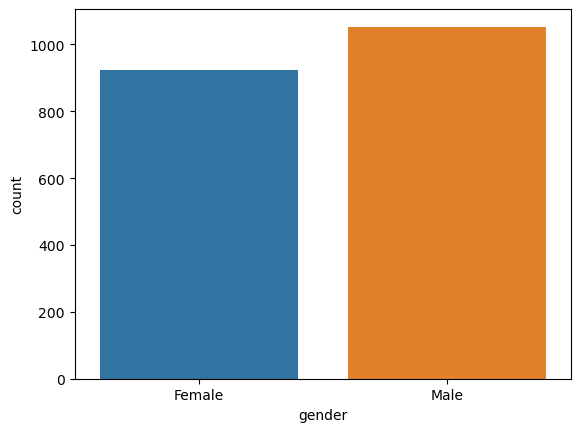

In [71]:
sns.countplot(x='gender',data=df1)

<Axes: xlabel='gender', ylabel='count'>

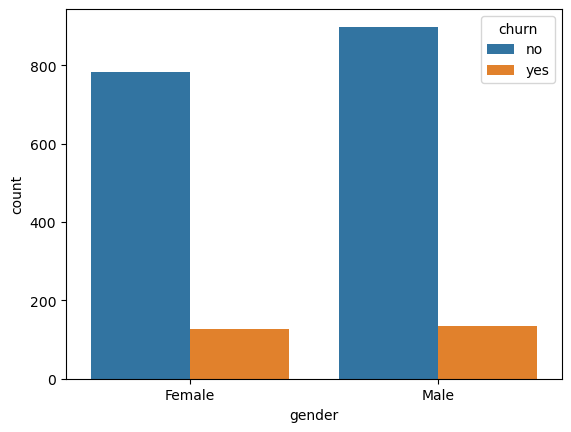

In [72]:
sns.countplot(x='gender', data=df1, hue='churn')

In [79]:
df1.groupby('gender')['churn'].value_counts()

gender  churn
Female  no       783
        yes      126
Male    no       898
        yes      134
Name: count, dtype: int64

In [87]:
# annotate

<Axes: xlabel='gender', ylabel='count'>

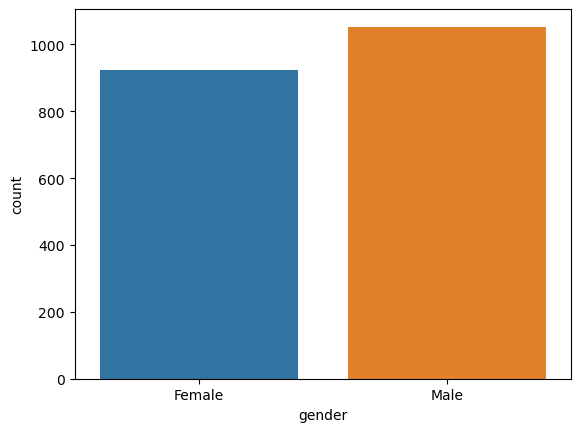

In [88]:
ax = sns.countplot(x='gender', data=df1)
ax

In [89]:
ax

<Axes: xlabel='gender', ylabel='count'>

In [90]:
print(ax)

Axes(0.125,0.11;0.775x0.77)


In [91]:
type(ax)

matplotlib.axes._axes.Axes

In [92]:
ax.patches

<Axes.ArtistList of 2 patches>

In [93]:
print(ax.patches)

<Axes.ArtistList of 2 patches>


In [95]:
for patch in ax.patches:
    print(patch)
# Male count: 1053
# Female count: 923

Rectangle(xy=(-0.4, 0), width=0.8, height=923, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=1053, angle=0)


In [96]:
df1['gender'].value_counts()

gender
Male      1053
Female     923
Name: count, dtype: int64

In [97]:
# we need to annotate that values inside the graph, how to do that?

<Axes: xlabel='gender', ylabel='count'>

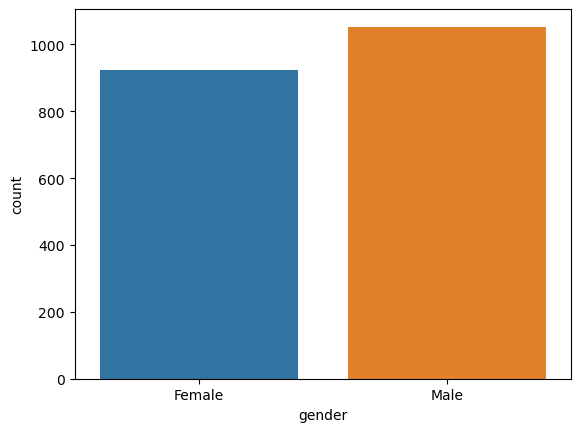

In [98]:
sns.countplot(x='gender', data=df1)

In [101]:
for patch in ax.patches:
    print(patch)
    print(patch.get_height)

Rectangle(xy=(-0.4, 0), width=0.8, height=923, angle=0)
<bound method Rectangle.get_height of <matplotlib.patches.Rectangle object at 0x000001E4FE3FD190>>
Rectangle(xy=(0.6, 0), width=0.8, height=1053, angle=0)
<bound method Rectangle.get_height of <matplotlib.patches.Rectangle object at 0x000001E4FE710090>>


In [102]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : single or two-tuple of str or `.Artist` or `.Transform` or callable, default: 'data'
    
  

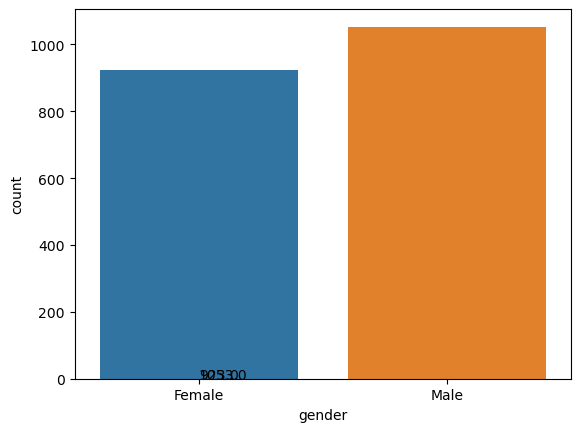

In [104]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    
    ax.annotate(value, xy=(0,0))

-0.4 923.0
0.6 1053.0


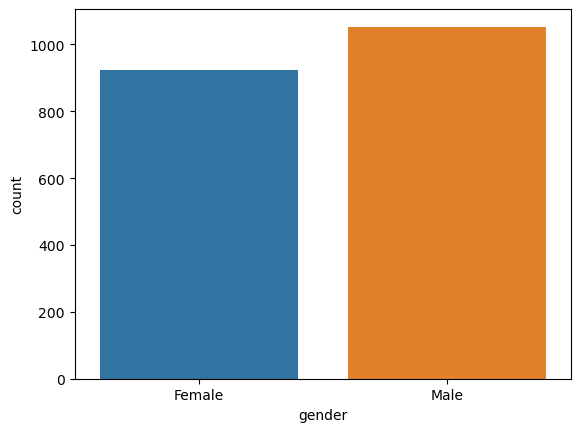

In [105]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    # ax.annotate(value, xy=(0, 0))

-0.4 923.0
0.6 1053.0


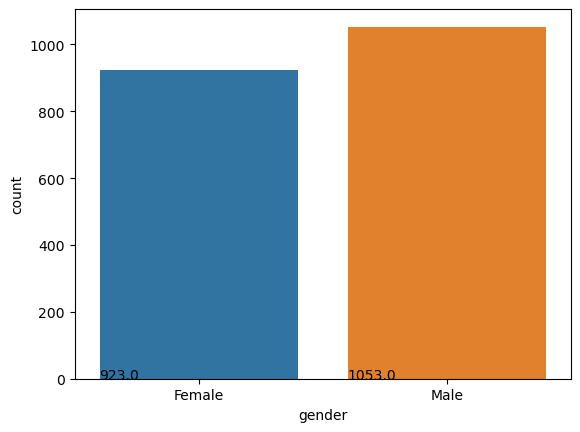

In [106]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis, 0))

-0.4 923.0
0.6 1053.0


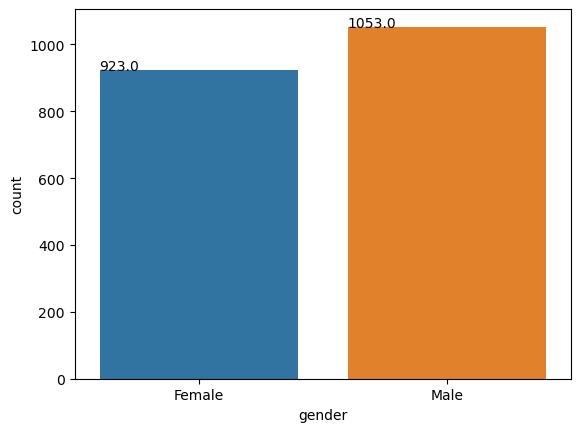

In [107]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis, value))

-0.4 923.0
0.6 1053.0


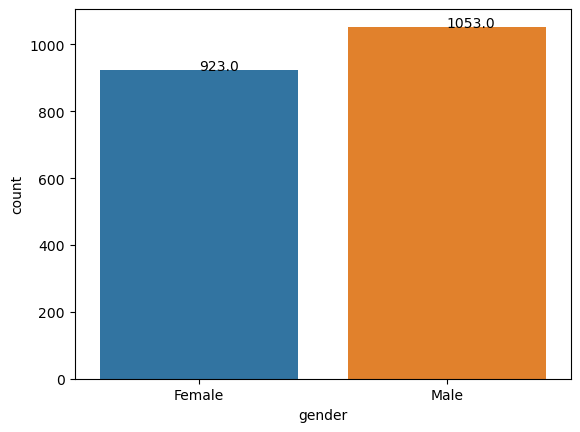

In [108]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis+0.4, value))

-0.4 923.0
0.6 1053.0


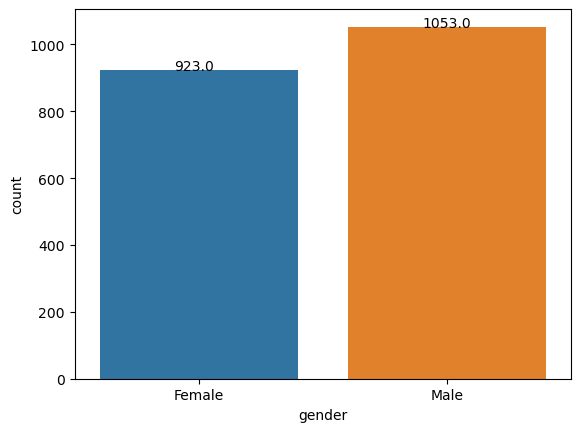

In [109]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis+0.3, value))

-0.4 923.0
0.6 1053.0


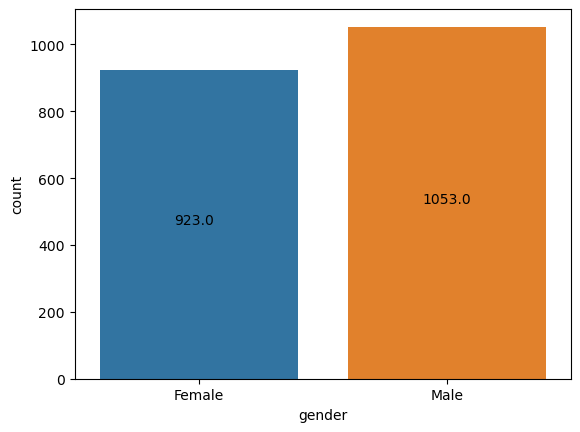

In [111]:
ax = sns.countplot(x='gender', data=df1)
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis+0.3, value/2))

In [112]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Note that the newer :func:`histplot` function offers more functionality, although
    its default behavior is somewhat different.
    
    .. note::
        This function always treats one of the variables as categorical and
        draws data at ordinal positions (0, 1, ... n) on the relevant axis,
        even when the data has a numeric or date type.
    
    See the :ref:`tutorial <categorical_tutorial>` for more information.    
    


In [113]:
# How to change the color

In [114]:
ax = sns.countplot(x='gender', data=df1, color=['yellow', 'green'])
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis+0.3, value/2))

ValueError: RGBA sequence should have length 3 or 4

-0.4 923.0
0.6 1053.0


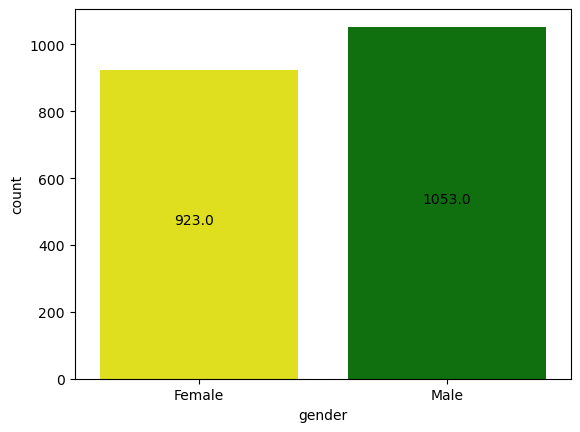

In [115]:
ax = sns.countplot(x='gender', data=df1, palette=['yellow', 'green'])
for patch in ax.patches:
    value = patch.get_height()
    x_axis = patch.get_x()
    print(x_axis, value)
    
    ax.annotate(value, xy=(x_axis+0.3, value/2))

In [117]:
df1['gender'].value_counts(dropna=False)

gender
Male      1053
Female     923
NaN         24
Name: count, dtype: int64

ValueError: 'label' must be of length 'x'

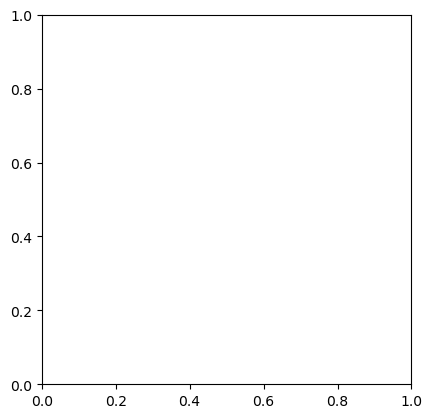

In [119]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=['Male','Female'])

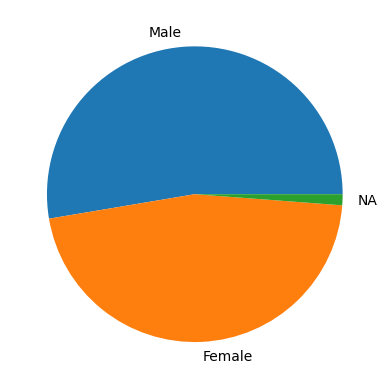

In [120]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=['Male','Female','NA'])
plt.show()

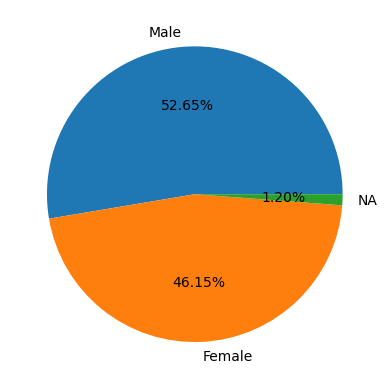

In [122]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=['Male','Female','NA'],
       autopct="%.2f%%")
plt.show()

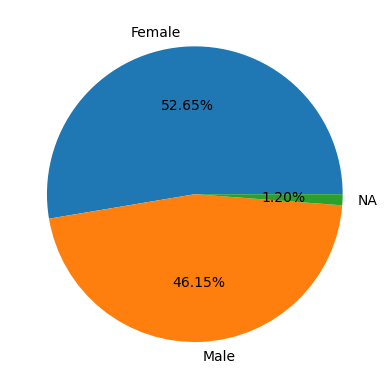

In [123]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=['Female', 'Male', 'NA'],
       autopct="%.2f%%")
plt.show()
# wh ever the gender u give first it will take it,it shd not take like that, it shd give actual values of male and female

In [124]:
df1['gender'].value_counts(dropna=False)

gender
Male      1053
Female     923
NaN         24
Name: count, dtype: int64

In [125]:
df1['gender'].value_counts(dropna=False).index

Index(['Male', 'Female', nan], dtype='object', name='gender')

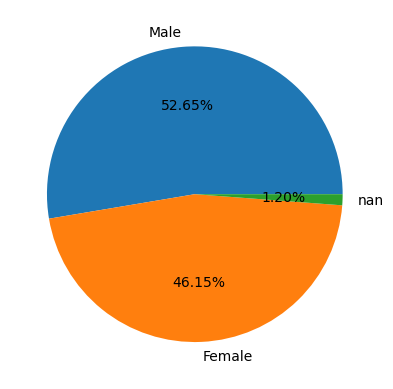

In [126]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=df1['gender'].value_counts(dropna=False).index, # give index, so that it will take actual values of male and female
       autopct="%.2f%%")
plt.show()

### What is the insight we get from this graph? How is this pie chart useful?

- In a pie chart, if the proportion of the percentages are same or close to each other, then that column has a high variance
- If the proportion difference increaese, the variance decreases.
- This graph also helps us to fill/handle NULL values

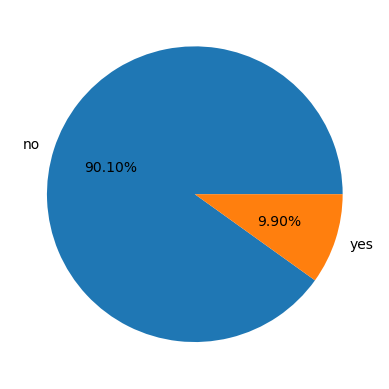

In [127]:
plt.pie(df1['multi_screen'].value_counts(dropna=False),
       labels=df1['multi_screen'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

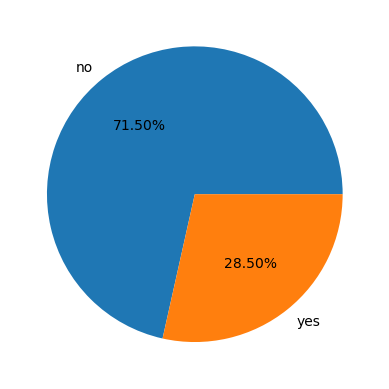

In [128]:
plt.pie(df1['mail_subscribed'].value_counts(dropna=False),
       labels=df1['mail_subscribed'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

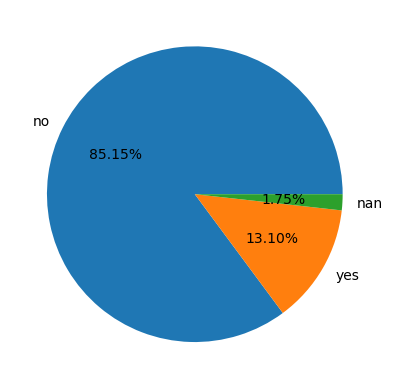

In [129]:
plt.pie(df1['churn'].value_counts(dropna=False),
       labels=df1['churn'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

([<matplotlib.patches.Wedge at 0x23db3490210>,
 [Text(-0.09147163040979686, 1.0961901937301637, 'Male'),
  Text(0.05009094471890198, -1.0988589068925856, 'Female'),
  Text(1.0992184135833023, -0.041459368536050506, 'nan')],
 [Text(-0.049893616587161925, 0.5979219238528165, '52.65%'),
  Text(0.02732233348303744, -0.5993775855777739, '46.15%'),
  Text(0.5995736801363467, -0.02261420101966391, '1.20%')])

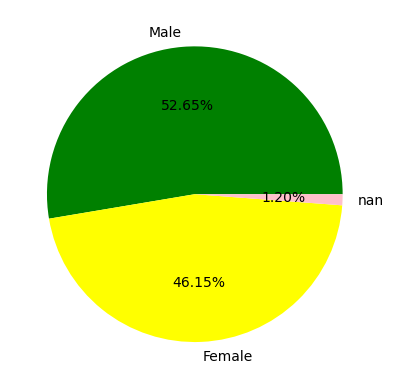

In [10]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=df1['gender'].value_counts(dropna=False).index,
       autopct="%.2f%%", colors=['green','yellow','pink'])

In [130]:
# Distribution of the data

In [131]:
df1

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,no


In [132]:
df1['no_of_days_subscribed']

0        62
1       149
2       126
3       131
4       191
       ... 
1995     75
1996    127
1997     94
1998     94
1999     73
Name: no_of_days_subscribed, Length: 2000, dtype: int64

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


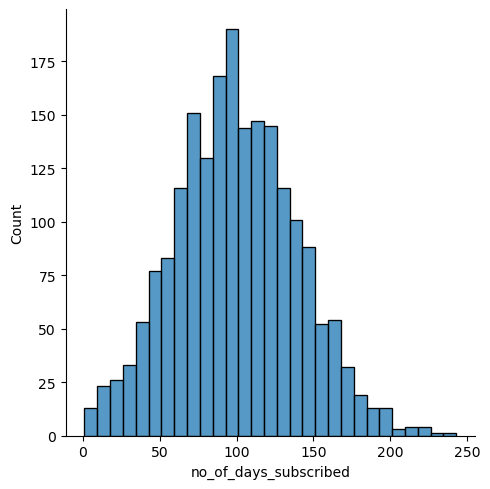

In [135]:
sns.displot(x='no_of_days_subscribed',data=df1)

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


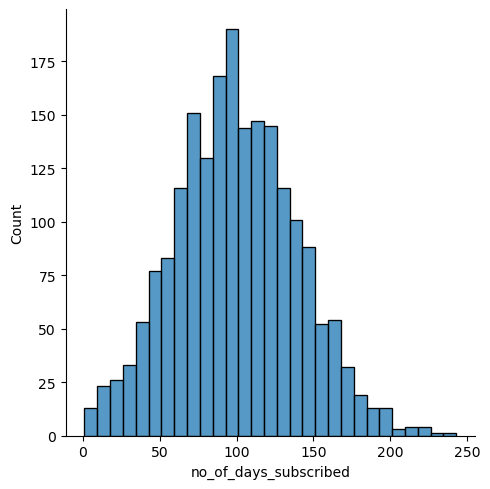

In [136]:
# or
sns.displot(df1['no_of_days_subscribed'])

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


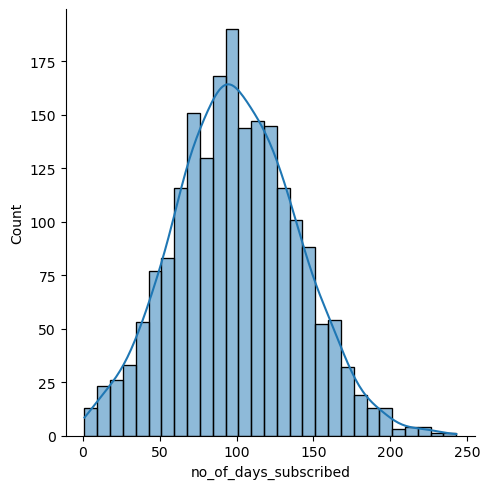

In [137]:
sns.displot(df1['no_of_days_subscribed'], kde=True)

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


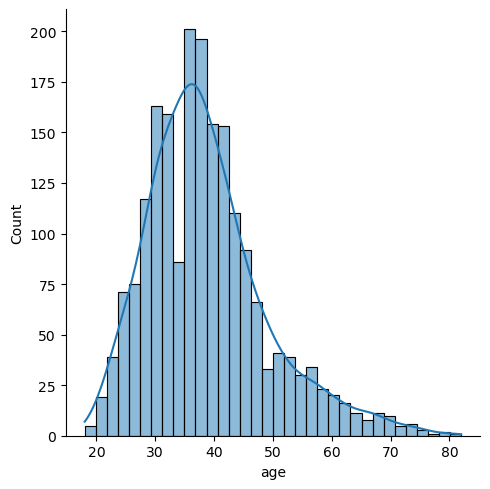

In [138]:
sns.displot(df1['age'], kde=True)

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


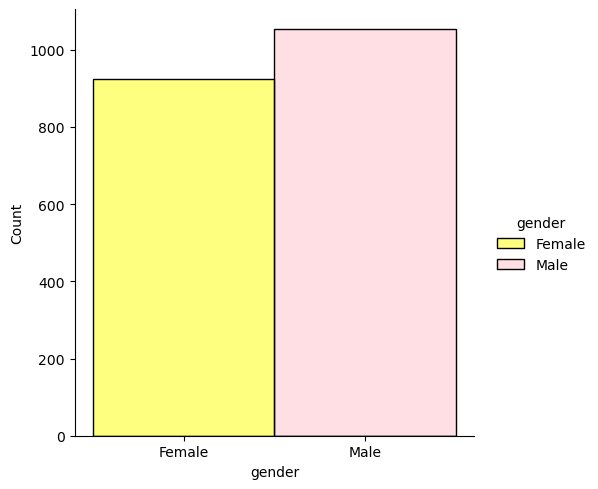

In [11]:
sns.displot(x='gender', hue='gender', data=df1, palette=['yellow', 'pink'])

In [139]:
# 21/05/24

In [140]:
df1

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,no


In [152]:
df1.nunique()

customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


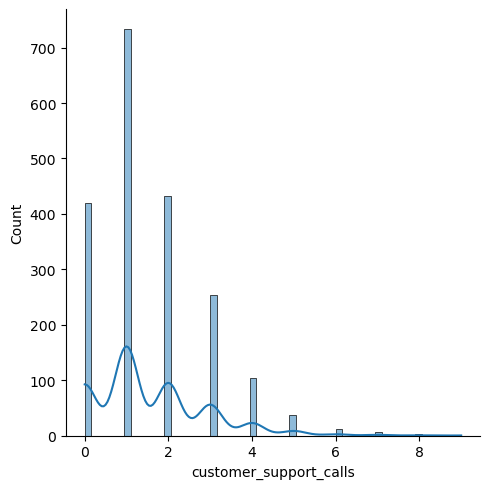

In [167]:
sns.displot(df1['customer_support_calls'], kde=True)

In [168]:
df1['customer_support_calls'].value_counts()

customer_support_calls
1    733
2    432
0    420
3    254
4    103
5     38
6     11
7      6
8      2
9      1
Name: count, dtype: int64

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


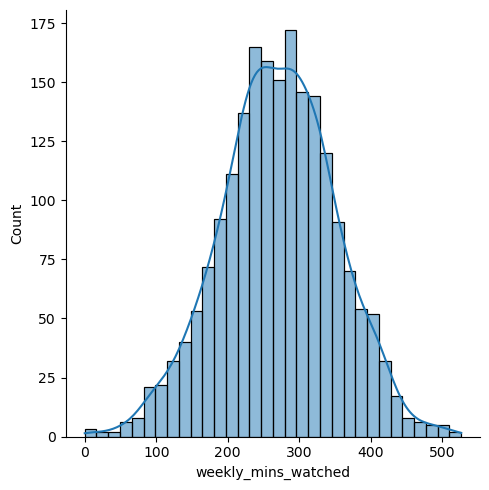

In [169]:
sns.displot(df1['weekly_mins_watched'], kde=True)

In [170]:
# Handle Null/Missing values

In [171]:
df1

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,no


In [172]:
df1.isnull().sum()

customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

### How to handle null values?

- Fill the values with - mean, median, mode, any appropriate value - fillna()
- Delete column
- Delete the row(s)


- Fill values:
    - For categorical columns
        - we usually fill the null values with mode (the most frequent value)
        - we can fill the nan values with least frequent value as well
        - Can fill null values as a new category
    - For numerical columns
        - we can fill the nan values with the mean, median of the column
        
- Delete the column(s)
    - if any column has more than 30-40% values missing, we delete that column
    - This 30-40% value is not a hard rule. It can vary and depend on the data or the requirement or column or use case
    
- Delete the row(s)
    - We should avoid deleting rows as much as we can as we lose important data
    
    Note: mode and most freq value is same, median and .50 quantile value is same

In [173]:
df1['age']

0       36
1       39
2       65
3       24
4       40
        ..
1995    54
1996    45
1997    53
1998    40
1999    37
Name: age, Length: 2000, dtype: int64

C:\Users\Santosh Raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


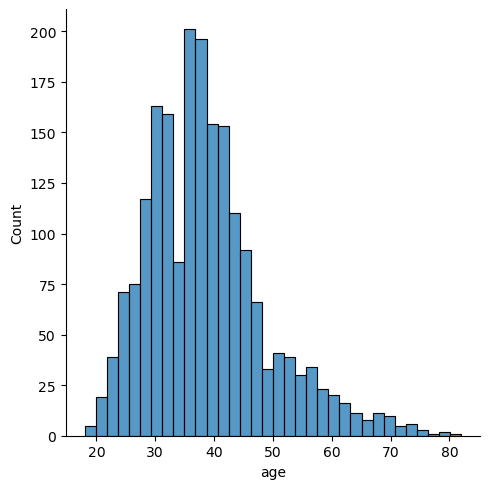

In [174]:
sns.displot(df1['age'])

In [178]:
df1['age'].value_counts()

age
36    104
38    102
35     97
37     94
34     86
     ... 
77      1
82      1
80      1
76      1
79      1
Name: count, Length: 63, dtype: int64

In [179]:
df1['age'].mean()

38.6905

In [180]:
df1['age'].sum()

77381

In [182]:
77381/2000

38.6905

In [186]:
df1['age'].value_counts()
# most freq appeared age is 36

age
36    104
38    102
35     97
37     94
34     86
     ... 
77      1
82      1
80      1
76      1
79      1
Name: count, Length: 63, dtype: int64

In [187]:
df1['age'].median()

37.0

In [188]:
df1.isnull().sum()

customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [191]:
df1.isnull().sum()/len(df1)*100

customer_id               0.00
phone_no                  0.00
gender                    1.20
age                       0.00
no_of_days_subscribed     0.00
multi_screen              0.00
mail_subscribed           0.00
weekly_mins_watched       0.00
minimum_daily_mins        0.00
maximum_daily_mins        0.00
weekly_max_night_mins     0.00
videos_watched            0.00
maximum_days_inactive     1.40
customer_support_calls    0.00
churn                     1.75
dtype: float64

- Columns to handle:
    - gender: categorical column - fill it with mode
    - maximum_days_inactive - fill it with median
    - churn - fill it with least frequent value

In [192]:
df1['maximum_days_inactive'].value_counts()

maximum_days_inactive
3.0    945
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: count, dtype: int64

In [193]:
df1['maximum_days_inactive'].mean()

3.2505070993914806

In [194]:
df1['maximum_days_inactive'].median()
# there is a small difference in mean and median, 
# mean value we are getting in fractional and median() value is float, max_days also float, thtsy filling it with median

3.0

In [195]:
df1['churn'].value_counts()

churn
no     1703
yes     262
Name: count, dtype: int64

In [196]:
df1['gender'].mode()

0    Male
Name: gender, dtype: object

In [198]:
df1['gender'].mode().loc[0]

'Male'

In [199]:
df1['gender'].value_counts()

gender
Male      1053
Female     923
Name: count, dtype: int64

In [200]:
df1['gender'].value_counts().index

Index(['Male', 'Female'], dtype='object', name='gender')

In [213]:
df1['gender'].value_counts().index[0]

'Male'

In [202]:
df1['gender'].value_counts().idxmax()

'Male'

In [203]:
df1['gender'].value_counts().idxmin()

'Female'

In [204]:
df1['churn'].value_counts().idxmin()

'yes'

In [208]:
df1['churn'].value_counts().idxmax()

'no'

In [206]:
df1['churn'].value_counts().median()

982.5

In [209]:
df1.fillna({'gender': df1['gender'].mode().iloc[0], 
            'maximum_days_inactive': df1['maximum_days_inactive'].median(),
           'churn': df1['churn'].value_counts().idxmin()})

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,no


In [214]:
df2 = df1.fillna({'gender': df1['gender'].mode().iloc[0], 
            'maximum_days_inactive': df1['maximum_days_inactive'].median(),
           'churn': df1['churn'].value_counts().idxmin()})
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,no
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,no
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,no


In [215]:
df2.isnull().sum()
# Now all null values are filled

customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

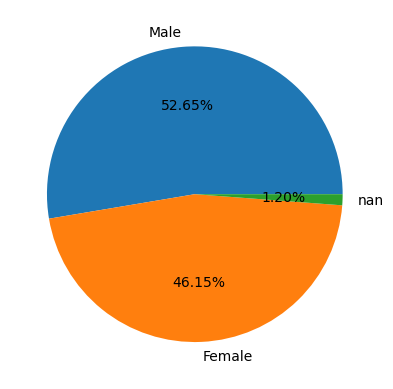

In [216]:
plt.pie(df1['gender'].value_counts(dropna=False),
       labels=df1['gender'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

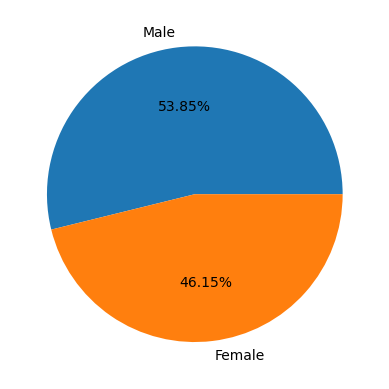

In [217]:
plt.pie(df2['gender'].value_counts(dropna=False),
       labels=df2['gender'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()
# see in df2 we have filled with nan values

In [218]:
df1['maximum_days_inactive'].mean()

3.2505070993914806

In [12]:
df2['maximum_days_inactive'].mean()

NameError: name 'df2' is not defined

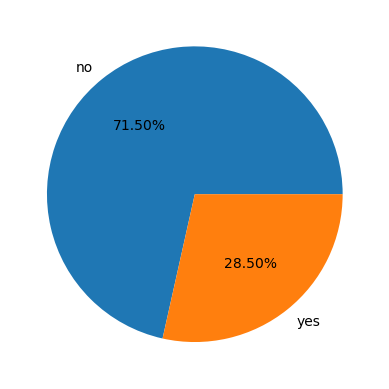

In [220]:
plt.pie(df1['mail_subscribed'].value_counts(dropna=False),
       labels=df1['mail_subscribed'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

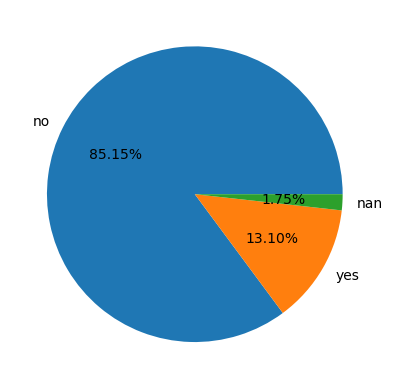

In [221]:
plt.pie(df1['churn'].value_counts(dropna=False),
       labels=df1['churn'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

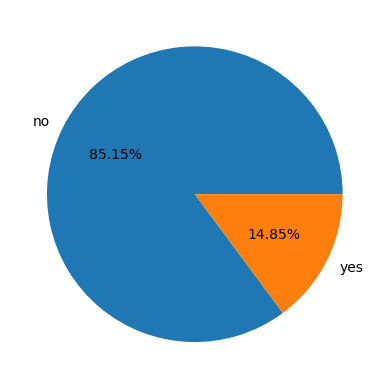

In [225]:
plt.pie(df2['churn'].value_counts(dropna=False),
       labels=df2['churn'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

In [228]:
## Outlier detection
# Mean: The average value.
# Median: The middle value when data points are sorted.
# Mode: The most frequently occurring value.

## Outlier detection

- What is an outlier?
    - values which are out of the usual range
    - values which are far away from the mean value

Methods to detect outliers:
- Quantile method:
    - Any value which is less than 'X' percentile and more than 'Y' percentile is treated as an Outlier.
    - 'X' and 'Y' can be any value depending on the data
    - less than 4 percentile and more than 97 percentile
    - less than 1 percentile and more than 99 percentile
    
- IQR method:
    - Also used by Boxplot of seaborn
    - We find the Interquartile range (IQR). IQR = Q3 - Q1
    - Find Upper bound/ limit = Q3 + 1.5 * IQR
    - Find Lower bound/ limit = Q1 - 1.5 * IQR
    - NOTE: The data should be sorted in ascending order

In [229]:
# Boxplot

In [230]:
df2.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,no
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,no
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,no
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,no


In [231]:
# no_of_days_subsribed

<Axes: ylabel='no_of_days_subscribed'>

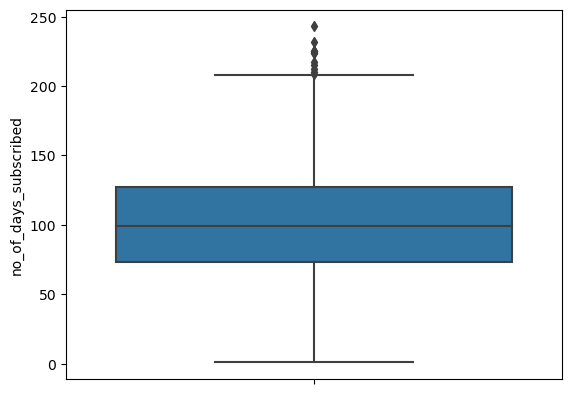

In [232]:
sns.boxplot(y=df2['no_of_days_subscribed'])

<Axes: ylabel='weekly_mins_watched'>

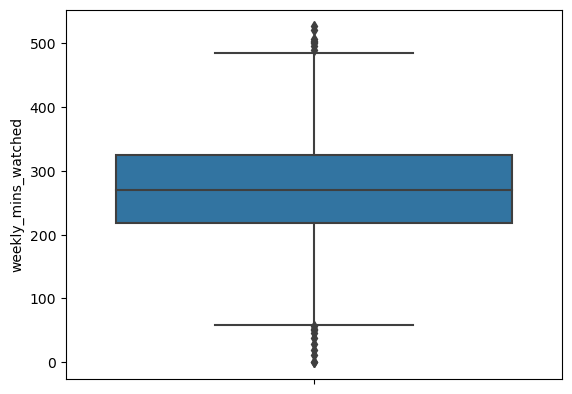

In [233]:
sns.boxplot(y=df2['weekly_mins_watched'])

<Axes: ylabel='videos_watched'>

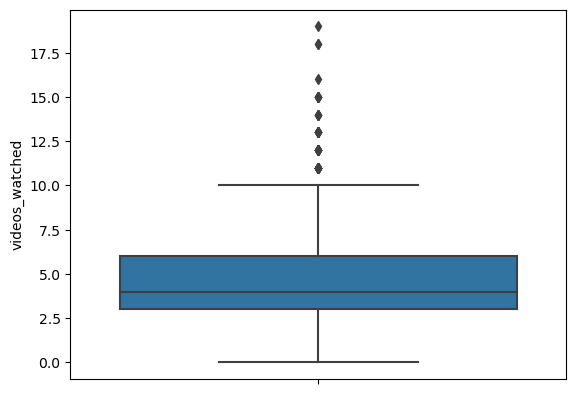

In [234]:
sns.boxplot(y=df2['videos_watched'])

In [235]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    .. note::
        This function always treats one of the variables as categorical and
        draws data at ordinal positions (0, 1, ... n) on the relevant axis,
        even when the data has a numeric or date type.

<Axes: ylabel='weekly_mins_watched'>

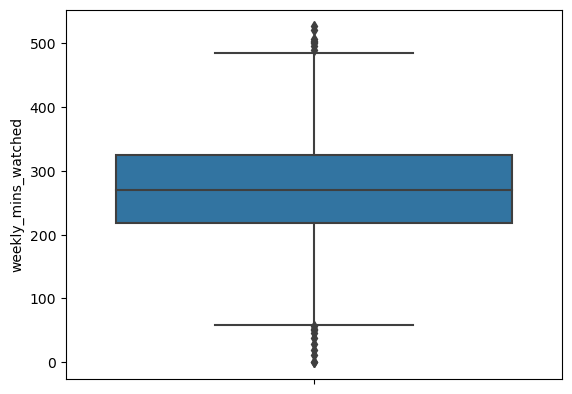

In [237]:
sns.boxplot(y=df2['weekly_mins_watched'])

<Axes: ylabel='videos_watched'>

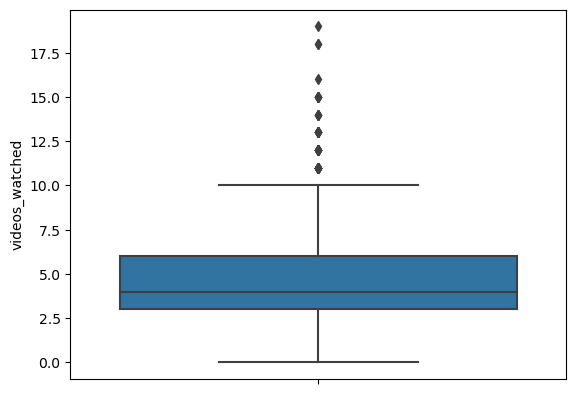

In [240]:
sns.boxplot(y=df2['videos_watched'])

<Axes: ylabel='weekly_mins_watched'>

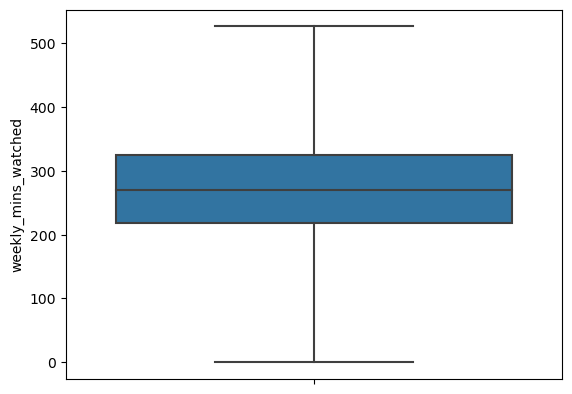

In [239]:
sns.boxplot(y=df2['weekly_mins_watched'], whis=3.5)
# Median (Q2): The line inside the box represents the median (50th percentile) of the data.
# First Quartile (Q1): The bottom of the box represents the first quartile (25th percentile).
# Third Quartile (Q3): The top of the box represents the third quartile (75th percentile).

<Axes: ylabel='videos_watched'>

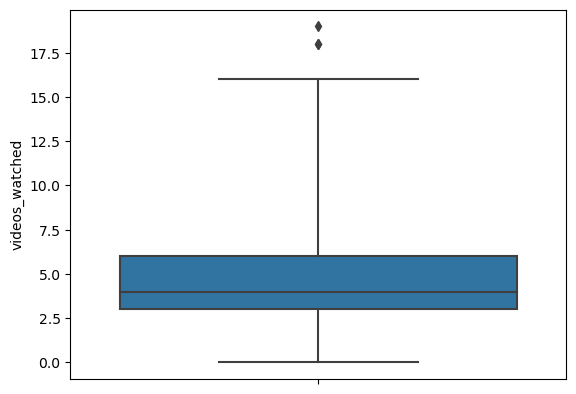

In [242]:
sns.boxplot(y=df2['videos_watched'], whis=3.5)
# whis parameter controls the length of the whiskers extending from the box.
# By default, whiskers extend to 1.5 times the interquartile range (IQR) from the first quartile (Q1) and third quartile (Q3). 

<Axes: ylabel='weekly_mins_watched'>

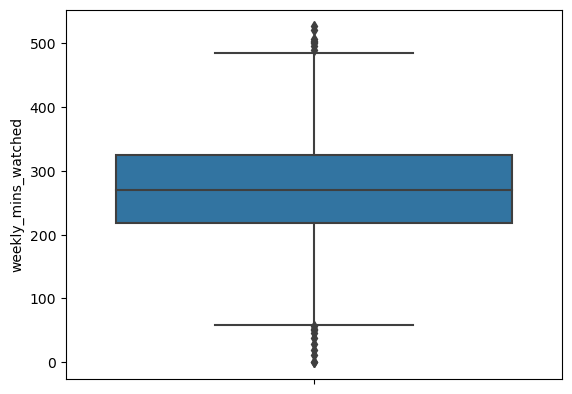

In [243]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [244]:
# IQR Method
df2["weekly_mins_watched"]

0       148.35
1       294.45
2        87.30
3       321.30
4       243.00
         ...  
1995    182.25
1996    273.45
1997    128.85
1998    178.05
1999    326.70
Name: weekly_mins_watched, Length: 2000, dtype: float64

In [245]:
df2['weekly_mins_watched'].sort_values(ascending=True)

785       0.00
1411      0.00
1614     11.85
1077     18.75
300      29.25
         ...  
1126    501.45
1838    503.25
1261    506.10
1523    520.20
1380    526.20
Name: weekly_mins_watched, Length: 2000, dtype: float64

In [246]:
week_mins_watched_sorted = df2['weekly_mins_watched'].sort_values(ascending=True)

In [247]:
week_mins_watched_sorted

785       0.00
1411      0.00
1614     11.85
1077     18.75
300      29.25
         ...  
1126    501.45
1838    503.25
1261    506.10
1523    520.20
1380    526.20
Name: weekly_mins_watched, Length: 2000, dtype: float64

In [248]:
q1 = week_mins_watched_sorted.quantile(.25) # Q1 is 25 percentile
q1

218.2125

In [249]:
q3 = week_mins_watched_sorted.quantile(.75) # Q3 is 75 percentile
q3

324.675

In [250]:
iqr = q3-q1
iqr

106.4625

In [251]:
lower_bound = q1 - (iqr * 1.5)
lower_bound

58.51874999999998

In [252]:
upper_bound = q3 + (iqr * 1.5)
upper_bound

484.36875000000003

<Axes: ylabel='weekly_mins_watched'>

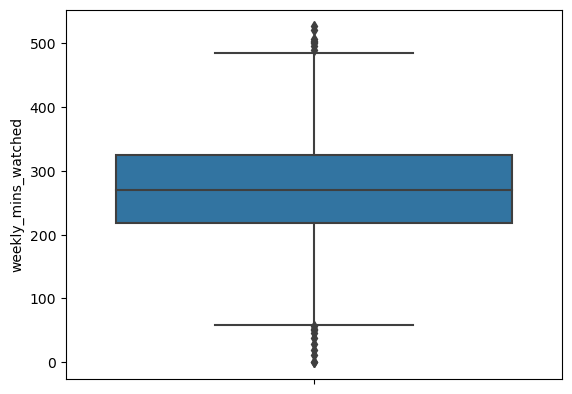

In [253]:
sns.boxplot(y=df2['weekly_mins_watched'])

<Axes: ylabel='weekly_mins_watched'>

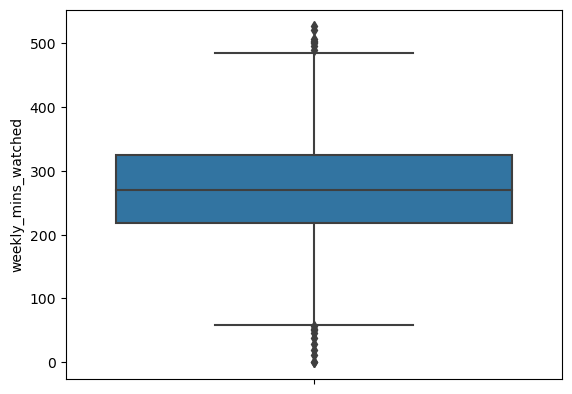

In [254]:
ax = sns.boxplot(y=df2['weekly_mins_watched'])
ax

In [255]:
for patch in ax.patches:
    print(patch)

PathPatch6((-0.4, 218.213) ...)


In [256]:
for patch in ax.patches:
    print(help(patch))

Help on PathPatch in module matplotlib.patches object:

class PathPatch(Patch)
 |  PathPatch(path, **kwargs)
 |  
 |  A general polycurve path patch.
 |  
 |  Method resolution order:
 |      PathPatch
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path, **kwargs)
 |      *path* is a `.Path` object.
 |      
 |      Valid keyword arguments are:
 |      
 |      Properties:
 |          agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
 |          alpha: unknown
 |          animated: bool
 |          antialiased or aa: bool or None
 |          capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
 |          clip_box: `.Bbox`
 |          clip_on: bool
 |          clip_path: Patch or (Path, Transform) or None
 |          color: color
 |          edgecolor or ec: color or None
 |          f

In [260]:
for xtick in ax.get_xticks():
    print(xtick)

0


In [261]:
week_mins_watched_sorted[week_mins_watched_sorted > upper_bound]

785       0.00
1411      0.00
1614     11.85
1077     18.75
300      29.25
         ...  
1038    473.40
994     481.95
1446    482.40
43      483.45
348     483.75
Name: weekly_mins_watched, Length: 1992, dtype: float64

In [262]:
week_mins_watched_sorted[week_mins_watched_sorted < lower_bound]

785      0.00
1411     0.00
1614    11.85
1077    18.75
300     29.25
304     38.85
937     46.35
1256    51.00
569     52.65
1476    56.70
Name: weekly_mins_watched, dtype: float64

In [263]:
week_mins_watched_sorted[(week_mins_watched_sorted < lower_bound) | (week_mins_watched_sorted > upper_bound)]

785       0.00
1411      0.00
1614     11.85
1077     18.75
300      29.25
304      38.85
937      46.35
1256     51.00
569      52.65
1476     56.70
1936    489.75
283     494.70
31      499.35
1126    501.45
1838    503.25
1261    506.10
1523    520.20
1380    526.20
Name: weekly_mins_watched, dtype: float64

In [266]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
31,111338,351-7269,Male,45,161,no,no,499.35,5.4,56.59,128,9,2.0,4,yes
283,225874,393-4823,Male,42,82,no,no,494.70,10.6,56.07,102,6,3.0,0,yes
300,234709,370-9533,Female,38,138,no,yes,29.25,7.9,3.32,111,1,3.0,0,no
304,235673,337-4339,Male,39,53,no,yes,38.85,6.5,4.40,64,7,2.0,1,no
569,361426,361-5225,Male,34,122,no,no,52.65,12.7,5.97,58,2,4.0,1,no
785,466759,392-2555,Male,26,98,no,no,0.00,6.8,0.00,88,1,2.0,4,yes
937,538753,408-4530,Female,42,63,no,yes,46.35,8.6,5.25,101,7,3.0,1,no
1077,599684,378-6772,Male,38,98,yes,no,18.75,7.7,2.13,88,9,3.0,1,no
1126,621278,332-6181,Female,36,129,no,no,501.45,10.4,56.83,83,6,3.0,0,yes
1256,679437,337-1225,Male,24,66,no,no,51.00,11.5,5.78,120,3,4.0,0,no


In [267]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)]['weekly_mins_watched']

31      499.35
283     494.70
300      29.25
304      38.85
569      52.65
785       0.00
937      46.35
1077     18.75
1126    501.45
1256     51.00
1261    506.10
1380    526.20
1411      0.00
1476     56.70
1523    520.20
1614     11.85
1838    503.25
1936    489.75
Name: weekly_mins_watched, dtype: float64

In [277]:
# 22/05/24

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv("customer_churn_data.csv")
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [170]:
df1 = df.drop(['year'],axis=1)
df1

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [171]:
df1['churn'] = df1['churn'].map({1.0: 'Yes', 0.0: 'No'})

In [172]:
df2 = df1.fillna({'gender': df1['gender'].mode().iloc[0], 
            'maximum_days_inactive': df1['maximum_days_inactive'].median(),
           'churn': df1['churn'].value_counts().idxmin()})

In [173]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


<Axes: ylabel='weekly_mins_watched'>

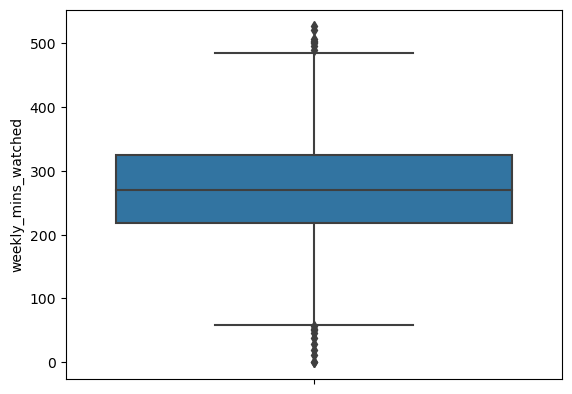

In [97]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [174]:
week_mins_watched_sorted = df2['weekly_mins_watched'].sort_values(ascending=True)

In [175]:
q1 = week_mins_watched_sorted.quantile(.25) # Q1 is 25 percentile

In [176]:
q3 = week_mins_watched_sorted.quantile(.75) # Q3 is 75 percentile

In [177]:
iqr = q3 - q1

In [178]:
lower_bound = q1 - (iqr * 1.5)
lower_bound

58.51874999999998

In [179]:
upper_bound = q3 + (iqr * 1.5)
upper_bound

484.36875000000003

In [180]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


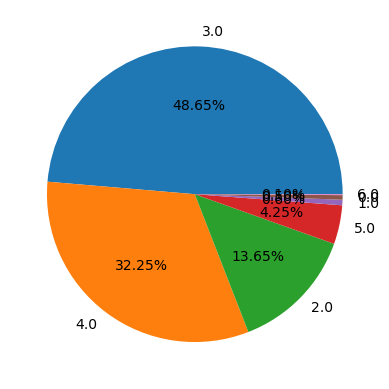

In [105]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

In [296]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie

In [181]:
df2['maximum_days_inactive'].value_counts(dropna=False)

maximum_days_inactive
3.0    973
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: count, dtype: int64

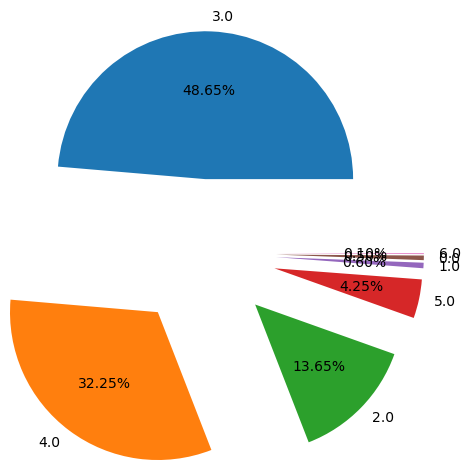

In [107]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%",
       explode=[.5, .5, .5, .5, .5, .5, .5])
plt.show()

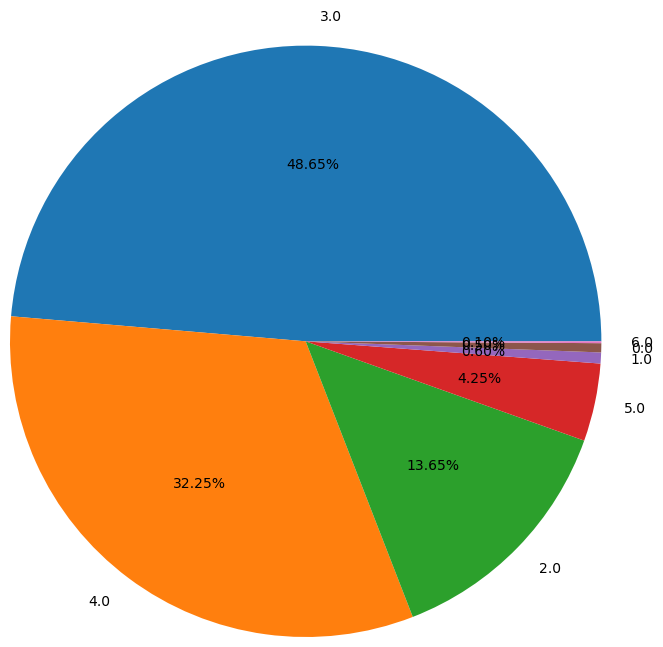

In [108]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%",
       radius=2)
plt.show()

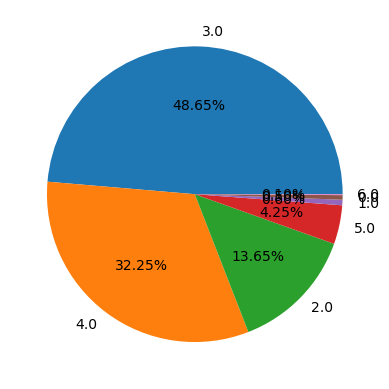

In [109]:
plt.pie(df2['maximum_days_inactive'].value_counts(dropna=False),
       labels=df2['maximum_days_inactive'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

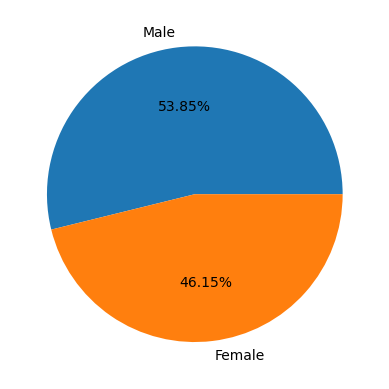

In [110]:
plt.pie(df2['gender'].value_counts(dropna=False),
       labels=df2['gender'].value_counts(dropna=False).index,
       autopct="%.2f%%")
plt.show()

In [111]:
# Outlier Handling

<Axes: ylabel='weekly_mins_watched'>

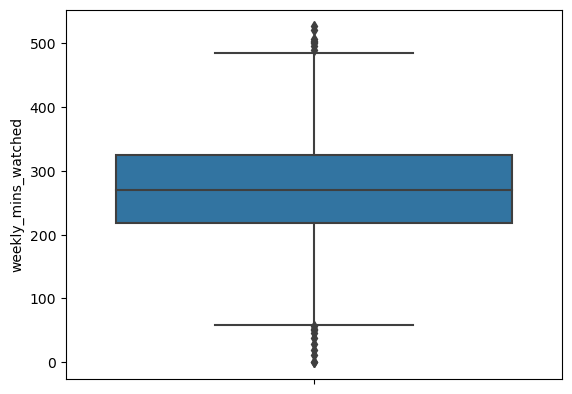

In [182]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [183]:
upper_bound

484.36875000000003

In [184]:
lower_bound

58.51874999999998

In [185]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
31,111338,351-7269,Male,45,161,no,no,499.35,5.4,56.59,128,9,2.0,4,Yes
283,225874,393-4823,Male,42,82,no,no,494.70,10.6,56.07,102,6,3.0,0,Yes
300,234709,370-9533,Female,38,138,no,yes,29.25,7.9,3.32,111,1,3.0,0,No
304,235673,337-4339,Male,39,53,no,yes,38.85,6.5,4.40,64,7,2.0,1,No
569,361426,361-5225,Male,34,122,no,no,52.65,12.7,5.97,58,2,4.0,1,No
785,466759,392-2555,Male,26,98,no,no,0.00,6.8,0.00,88,1,2.0,4,Yes
937,538753,408-4530,Female,42,63,no,yes,46.35,8.6,5.25,101,7,3.0,1,No
1077,599684,378-6772,Male,38,98,yes,no,18.75,7.7,2.13,88,9,3.0,1,No
1126,621278,332-6181,Female,36,129,no,no,501.45,10.4,56.83,83,6,3.0,0,Yes
1256,679437,337-1225,Male,24,66,no,no,51.00,11.5,5.78,120,3,4.0,0,No


In [186]:
len(df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)])

18

Outliers are usually deleted.

We will NOT delete the outliers, we will rather replace them. The values which are lower than the lower bound, will be replaced by the lower limit value. And the values which are more than the upper bound, will be replaced by the upper bound value.

In [308]:
# This can be done using clip()

In [309]:
help(df2.clip)

Help on method clip in module pandas.core.frame:

clip(lower: 'float | None' = None, upper: 'float | None' = None, *, axis: 'Axis | None' = None, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Trim values at input threshold(s).
    
    Assigns values outside boundary to boundary values. Thresholds
    can be singular values or array like, and in the latter case
    the clipping is performed element-wise in the specified axis.
    
    Parameters
    ----------
    lower : float or array-like, default None
        Minimum threshold value. All values below this
        threshold will be set to it. A missing
        threshold (e.g `NA`) will not clip the value.
    upper : float or array-like, default None
        Maximum threshold value. All values above this
        threshold will be set to it. A missing
        threshold (e.g `NA`) will not clip the value.
    axis : {{0 or 'index', 1 or 'columns', None}}, default None
     

In [187]:
df2['weekly_mins_watched'].clip(lower=lower_bound, upper=upper_bound)

0       148.35
1       294.45
2        87.30
3       321.30
4       243.00
         ...  
1995    182.25
1996    273.45
1997    128.85
1998    178.05
1999    326.70
Name: weekly_mins_watched, Length: 2000, dtype: float64

In [188]:
weekly_mins_clipped = df2['weekly_mins_watched'].clip(lower=lower_bound, upper=upper_bound)

<Axes: ylabel='weekly_mins_watched'>

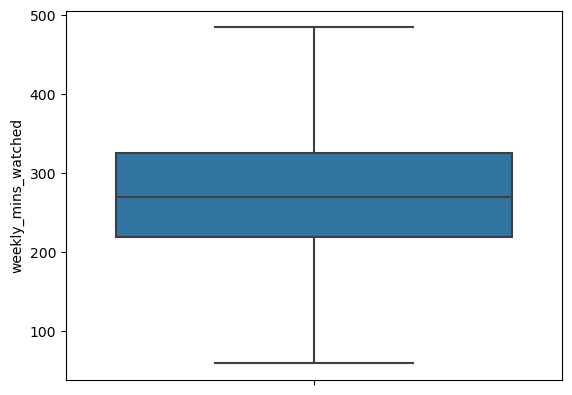

In [189]:
sns.boxplot(y=weekly_mins_clipped)

<Axes: ylabel='weekly_mins_watched'>

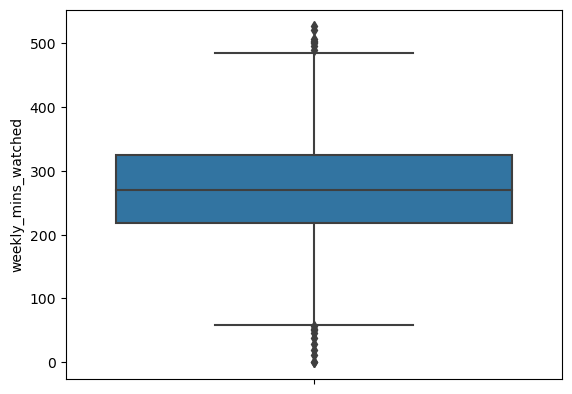

In [119]:
sns.boxplot(y=df2['weekly_mins_watched'])

In [313]:
# if u want to permanently delete the outliers
# df2['weekly_mins_watched'] = df2['weekly_mins_watched'].clip(lower=lower_bound, upper=upper_bound)

In [190]:
# Before clipping
week_mins_watched_sorted[(week_mins_watched_sorted < lower_bound) | (week_mins_watched_sorted > upper_bound)]

785       0.00
1411      0.00
1614     11.85
1077     18.75
300      29.25
304      38.85
937      46.35
1256     51.00
569      52.65
1476     56.70
1936    489.75
283     494.70
31      499.35
1126    501.45
1838    503.25
1261    506.10
1523    520.20
1380    526.20
Name: weekly_mins_watched, dtype: float64

In [191]:
# After clipping - empty list
weekly_mins_clipped[(weekly_mins_clipped < lower_bound) | (weekly_mins_clipped > upper_bound)]

Series([], Name: weekly_mins_watched, dtype: float64)

In [192]:
# for upper bound
weekly_mins_clipped.loc[1936]

484.36875000000003

In [193]:
# for lower bound
weekly_mins_clipped.loc[785]

58.51874999999998

In [194]:
# We can delete the rows having the outliers
18/2000

0.009

In [195]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
31,111338,351-7269,Male,45,161,no,no,499.35,5.4,56.59,128,9,2.0,4,Yes
283,225874,393-4823,Male,42,82,no,no,494.70,10.6,56.07,102,6,3.0,0,Yes
300,234709,370-9533,Female,38,138,no,yes,29.25,7.9,3.32,111,1,3.0,0,No
304,235673,337-4339,Male,39,53,no,yes,38.85,6.5,4.40,64,7,2.0,1,No
569,361426,361-5225,Male,34,122,no,no,52.65,12.7,5.97,58,2,4.0,1,No
785,466759,392-2555,Male,26,98,no,no,0.00,6.8,0.00,88,1,2.0,4,Yes
937,538753,408-4530,Female,42,63,no,yes,46.35,8.6,5.25,101,7,3.0,1,No
1077,599684,378-6772,Male,38,98,yes,no,18.75,7.7,2.13,88,9,3.0,1,No
1126,621278,332-6181,Female,36,129,no,no,501.45,10.4,56.83,83,6,3.0,0,Yes
1256,679437,337-1225,Male,24,66,no,no,51.00,11.5,5.78,120,3,4.0,0,No


In [196]:
df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)].index

Index([  31,  283,  300,  304,  569,  785,  937, 1077, 1126, 1256, 1261, 1380,
       1411, 1476, 1523, 1614, 1838, 1936],
      dtype='int64')

In [197]:
rows_to_delete = df2[(df2['weekly_mins_watched'] < lower_bound) | (df2['weekly_mins_watched'] > upper_bound)].index

In [198]:
df2.drop(rows_to_delete)
# check rows - 1982, 18 rows are deleted
# if u want to permanently delete use inplace = True

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


### Outlier detection and handling using Quantile method

- Quantile method:
    - Any value which is less than 'X' percentile and more than 'Y' percentile is treated as an Outlier.
    - 'X' and 'Y' can be any value depending on the data
    - less than 4 percentile and more than 97 percentile
    - less than 1 percentile and more than 99 percentile

In [199]:
lower_limit = df2['weekly_mins_watched'].quantile(0.04)
lower_limit

124.482

In [200]:
upper_limit = df2['weekly_mins_watched'].quantile(0.97)
upper_limit

417.4545

In [201]:
weekly_mins_clipped_quantile = df2['weekly_mins_watched'].clip(lower=lower_limit, upper=upper_limit)

<Axes: ylabel='weekly_mins_watched'>

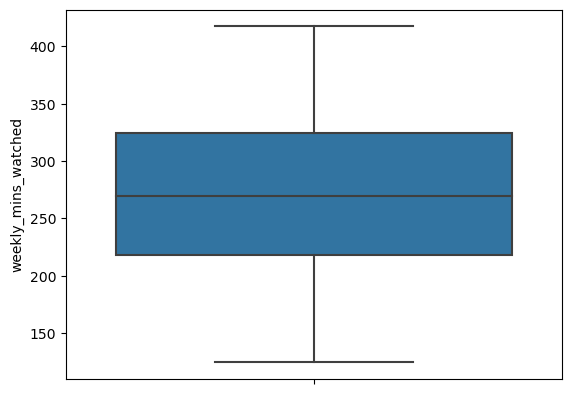

In [202]:
sns.boxplot(y=weekly_mins_clipped_quantile)

In [203]:
lower_limit

124.482

In [204]:
lower_bound

58.51874999999998

In [205]:
upper_limit

417.4545

In [206]:
upper_bound

484.36875000000003

In [207]:
df2['weekly_mins_watched'].sort_values().quantile(0.04)

124.482

### Encoding

- Encoding is done to encode the categorical data to numerical

In [208]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,No
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,No
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,Yes
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,No
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,Yes
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,No
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,No
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,No


In [343]:
# Change the churn column to 0 and 1

In [209]:
df2['churn'].map({'No':0, 'Yes':1})

0       0
1       0
2       1
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    0
1999    1
Name: churn, Length: 2000, dtype: int64

In [210]:
df2['churn'] = df2['churn'].map({'Yes':1, 'No':0})

In [211]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [212]:
df2['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
1995    Female
1996      Male
1997      Male
1998      Male
1999      Male
Name: gender, Length: 2000, dtype: object

In [213]:
df2['gender'].map({'Female': 1, 'Male': 2})
# But how customers will know 1 is female, 2 male?
# So we create the separate columns - # get_dummies

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    2
1997    2
1998    2
1999    2
Name: gender, Length: 2000, dtype: int64

In [351]:
# get_dummies

In [215]:
pd.get_dummies(df2['gender']).astype(int)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [216]:
gender_dummies = pd.get_dummies(df2['gender']).astype(int)

In [217]:
gender_dummies

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [218]:
df2

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [366]:
# concat df2 and gender_dummies

In [219]:
df3 = pd.concat([df2, gender_dummies], axis=1)

In [220]:
df3

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [369]:
# Delete the column for which we created the dummies - 'gender'

In [221]:
df3.drop(['gender'], axis=1, inplace=True)

In [222]:
df3

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [223]:
pd.get_dummies(df3['multi_screen']).astype(int)

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [224]:
pd.get_dummies(df3['mail_subscribed']).astype(int)

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [375]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [158]:
df3

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0
1996,998086,383-9255,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1
1997,998474,353-2080,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1
1998,998934,359-7788,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1


In [231]:
# How can we name the dummies for column multi screen
pd.get_dummies(df3['multi_screen'], prefix='multi_screen').astype(int)

,multi_screen_no,multi_screen_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [232]:
pd.get_dummies(df3['mail_subscribed'], prefix='mail_subs').astype(int)

,mail_subs_no,mail_subs_yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [233]:
multi_screen_dummies = pd.get_dummies(df3['multi_screen'], prefix='multi_screen').astype(int)

In [234]:
multi_screen_dummies

,multi_screen_no,multi_screen_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,1,0
1997,1,0
1998,1,0


In [383]:
# concat df2 and multi_screen_dummies

In [235]:
df4 = pd.concat([df3, multi_screen_dummies], axis=1)

In [236]:
df4

,customer_id,phone_no,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
0,100198,409-8743,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
1,100643,340-5930,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0
2,100756,372-3750,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0
3,101595,331-4902,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0
4,101653,351-8398,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0
1996,998086,383-9255,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0
1997,998474,353-2080,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0
1998,998934,359-7788,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1,1,0


In [387]:
# Delete the column for which we created the dummies - 'multi_screen'

In [237]:
df4.drop(['multi_screen'], axis=1, inplace=True)

In [238]:
df4.head(2)

,customer_id,phone_no,age,no_of_days_subscribed,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes
0,100198,409-8743,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0
1,100643,340-5930,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0


In [239]:
mail_subscribed_dummies = pd.get_dummies(df4['mail_subscribed'], prefix='mail_subscribed').astype(int)
mail_subscribed_dummies

,mail_subscribed_no,mail_subscribed_yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1995,0,1
1996,1,0
1997,1,0
1998,1,0


In [392]:
# concat df2 and mails_subscribed_dummies

In [240]:
df5 = pd.concat([df4, mail_subscribed_dummies], axis=1)

In [241]:
df5

,customer_id,phone_no,age,no_of_days_subscribed,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,100198,409-8743,36,62,no,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0,1,0
1,100643,340-5930,39,149,no,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0,1,0
2,100756,372-3750,65,126,no,87.30,11.9,9.89,91,1,4.0,5,1,1,0,1,0,1,0
3,101595,331-4902,24,131,yes,321.30,9.5,36.41,102,4,3.0,3,0,1,0,1,0,0,1
4,101653,351-8398,40,191,no,243.00,10.9,27.54,83,7,3.0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,54,75,yes,182.25,11.3,20.66,97,5,4.0,2,1,1,0,1,0,0,1
1996,998086,383-9255,45,127,no,273.45,9.3,30.99,116,3,3.0,1,0,0,1,1,0,1,0
1997,998474,353-2080,53,94,no,128.85,15.6,14.60,110,16,5.0,0,0,0,1,1,0,1,0
1998,998934,359-7788,40,94,no,178.05,10.4,20.18,100,6,3.0,3,0,0,1,1,0,1,0


In [396]:
# Delete the column for which we created the dummies - 'mail_subscribed'

In [245]:
df5.drop(['mail_subscribed'], axis=1, inplace=True)

In [246]:
df5.head(2)

,customer_id,phone_no,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,100198,409-8743,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0,1,0,1,0
1,100643,340-5930,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0,1,0,1,0


In [249]:
df5.drop(['phone_no'], axis=1, inplace=True)

In [250]:
df5.dtypes

customer_id                 int64
age                         int64
no_of_days_subscribed       int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                       int64
Female                      int32
Male                        int32
multi_screen_no             int32
multi_screen_yes            int32
mail_subscribed_no          int32
mail_subscribed_yes         int32
dtype: object

Corelation

In [251]:
df5.corr()

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
customer_id,1.000000,0.023830,-0.011457,-0.013830,0.033733,-0.013834,0.009713,0.063967,0.047070,-0.036009,-0.081924,0.012224,-0.012224,0.037957,-0.037957,0.054181,-0.054181
age,0.023830,1.000000,0.038822,0.016316,-0.000676,0.016328,0.016645,0.013076,0.006334,0.000618,0.009222,0.008814,-0.008814,-0.002835,0.002835,0.011570,-0.011570
no_of_days_subscribed,-0.011457,0.038822,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002344,0.001785,-0.001785,-0.033423,0.033423,0.019131,-0.019131
weekly_mins_watched,-0.013830,0.016316,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.164291,-0.002754,0.002754,-0.062180,0.062180,-0.014953,0.014953
minimum_daily_mins,0.033733,-0.000676,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.063259,-0.013182,0.013182,-0.049270,0.049270,-0.035733,0.035733
maximum_daily_mins,-0.013834,0.016328,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.164292,-0.002742,0.002742,-0.062178,0.062178,-0.014952,0.014952
weekly_max_night_mins,0.009713,0.016645,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.001123,-0.033571,0.033571,-0.033932,0.033932,-0.007214,0.007214
videos_watched,0.063967,0.013076,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.027308,-0.027563,0.027563,-0.029931,0.029931,-0.001770,0.001770
maximum_days_inactive,0.047070,0.006334,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044858,-0.027430,0.027430,-0.031440,0.031440,-0.037498,0.037498
customer_support_calls,-0.036009,0.000618,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.199488,-0.007537,0.007537,0.005483,-0.005483,-0.004389,0.004389


In [405]:
# Correlation value is between -1 and +1

In [252]:
df5.columns

Index(['customer_id', 'age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn', 'Female', 'Male', 'multi_screen_no', 'multi_screen_yes',
       'mail_subscribed_no', 'mail_subscribed_yes'],
      dtype='object')

In [253]:
cols_for_corr = ['age', 'no_of_days_subscribed', 'weekly_mins_watched', 'weekly_max_night_mins',
                'videos_watched', 'maximum_days_inactive', 'customer_support_calls', 'Female', 'Male', 'churn']

In [254]:
df6 = df5[cols_for_corr]

In [255]:
df6

,age,no_of_days_subscribed,weekly_mins_watched,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,Female,Male,churn
0,36,62,148.35,82,1,4.0,1,1,0,0
1,39,149,294.45,87,3,3.0,2,1,0,0
2,65,126,87.30,91,1,4.0,5,1,0,1
3,24,131,321.30,102,4,3.0,3,1,0,0
4,40,191,243.00,83,7,3.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,54,75,182.25,97,5,4.0,2,1,0,1
1996,45,127,273.45,116,3,3.0,1,0,1,0
1997,53,94,128.85,110,16,5.0,0,0,1,0
1998,40,94,178.05,100,6,3.0,3,0,1,0


In [256]:
df6.corr()

,age,no_of_days_subscribed,weekly_mins_watched,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,Female,Male,churn
age,1.000000,0.038822,0.016316,0.016645,0.013076,0.006334,0.000618,0.008814,-0.008814,0.009222
no_of_days_subscribed,0.038822,1.000000,0.000657,-0.001967,0.019414,0.019338,0.013419,0.001785,-0.001785,0.002344
weekly_mins_watched,0.016316,0.000657,1.000000,0.037715,0.018619,-0.014018,-0.036848,-0.002754,0.002754,0.164291
weekly_max_night_mins,0.016645,-0.001967,0.037715,1.000000,-0.000298,0.026565,-0.003965,-0.033571,0.033571,0.001123
videos_watched,0.013076,0.019414,0.018619,-0.000298,1.000000,0.033929,-0.001201,-0.027563,0.027563,-0.027308
maximum_days_inactive,0.006334,0.019338,-0.014018,0.026565,0.033929,1.000000,-0.001523,-0.027430,0.027430,0.044858
customer_support_calls,0.000618,0.013419,-0.036848,-0.003965,-0.001201,-0.001523,1.000000,-0.007537,0.007537,0.199488
Female,0.008814,0.001785,-0.002754,-0.033571,-0.027563,-0.027430,-0.007537,1.000000,-1.000000,0.008277
Male,-0.008814,-0.001785,0.002754,0.033571,0.027563,0.027430,0.007537,-1.000000,1.000000,-0.008277
churn,0.009222,0.002344,0.164291,0.001123,-0.027308,0.044858,0.199488,0.008277,-0.008277,1.000000


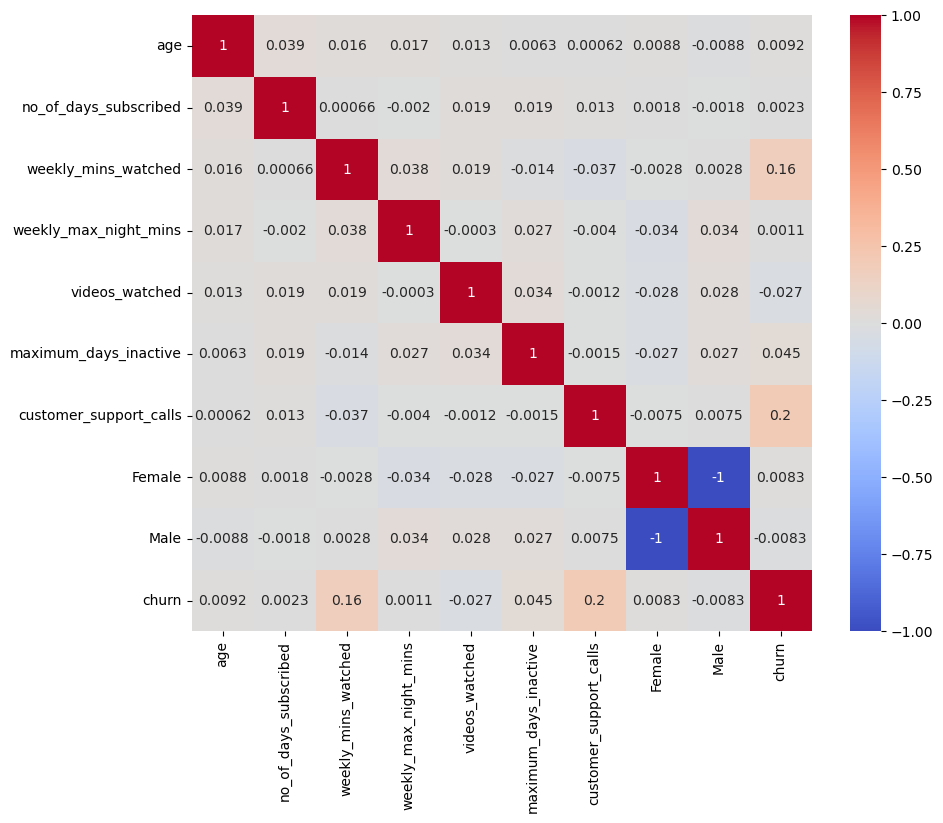

In [257]:
plt.figure(figsize=(10, 8))
sns.heatmap(df6.corr(), annot=True, cmap='coolwarm')
plt.show()

Exploratory Data Analysis (EDA)
Exploring/understanding the data and its nature

Looking at the data from different perspective

Fetching important and meaningful insights from the data

Why is it that we focus on data? Why is data so important?

summarise the data and make stories around the data
for making informed decisions
forecasting to improve the business
Why EDA is important?

FOr getting insights
For handling and cleaning data
EDA is an important step before we could move to machine learning
EDA helps us to understand the data - the columns/features, relation between the columns, the issues and problems associated with these columns and address them
Data Dictionary: the dataset columns (also called as metadata - data about the data)

Problem statement: the underlying issue/problem - we might need to find the problem statement as well when we perform EDA

In [412]:
#Steps in EDA
#Understand the shape of the data
#Basic information about the data - number of cols, names of cols, number of rows, datatype of the cols, null values in each col, ...
#Statistical summary of the data
#Check for null values
#Check for duplicate values
#Check for unique values
#Understand the numerical and categorical cols
#Treat/deal with with null data Or handle null data
#Distribution of the data
#Treatment of null values
#Treatment of duplicate values
#Handle of unique values
#Co-relation
#Outliers detection and treatment
#Graphs
#Encoding

In [413]:
df3

,customer_id,phone_no,gender,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,mail_subscribed_no,mail_subscribed_yes
0,100198,409-8743,Female,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,340-5930,Female,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,372-3750,Female,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,331-4902,Female,24,131,321.30,9.5,36.41,102,4,3.0,3,0,0,1
4,101653,351-8398,Female,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,385-7387,Female,54,75,182.25,11.3,20.66,97,5,4.0,2,1,0,1
1996,998086,383-9255,Male,45,127,273.45,9.3,30.99,116,3,3.0,1,0,1,0
1997,998474,353-2080,Male,53,94,128.85,15.6,14.60,110,16,5.0,0,0,1,0
1998,998934,359-7788,Male,40,94,178.05,10.4,20.18,100,6,3.0,3,0,1,0


In [414]:
# The columns which we think are NOT important can be deleted - 'phone_no'

In [416]:
df3.drop(['phone_no'], axis=1, inplace=True)

In [417]:
df3

,customer_id,gender,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,mail_subscribed_no,mail_subscribed_yes
0,100198,Female,36,62,148.35,12.2,16.81,82,1,4.0,1,0,1,0
1,100643,Female,39,149,294.45,7.7,33.37,87,3,3.0,2,0,1,0
2,100756,Female,65,126,87.30,11.9,9.89,91,1,4.0,5,1,1,0
3,101595,Female,24,131,321.30,9.5,36.41,102,4,3.0,3,0,0,1
4,101653,Female,40,191,243.00,10.9,27.54,83,7,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,997132,Female,54,75,182.25,11.3,20.66,97,5,4.0,2,1,0,1
1996,998086,Male,45,127,273.45,9.3,30.99,116,3,3.0,1,0,1,0
1997,998474,Male,53,94,128.85,15.6,14.60,110,16,5.0,0,0,1,0
1998,998934,Male,40,94,178.05,10.4,20.18,100,6,3.0,3,0,1,0


In [418]:
# group by
# group the data based on the condition

In [419]:
# fetch the data/rows for the female customers

In [422]:
df2.query("gender == 'Female'")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,991428,348-1528,Female,36,42,no,no,233.10,9.0,26.42,128,3,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1992,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1


In [423]:
df2.query("gender == 'Male'")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
5,101953,329-6603,Male,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1
6,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0
8,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0
9,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0
10,103697,411-9554,Male,34,114,no,yes,338.70,8.4,38.39,100,9,3.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,1
1996,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0
1997,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0
1998,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0


In [424]:
gender_group = df2.groupby('gender')

In [425]:
gender_group

In [426]:
list(gender_group)

[('Female',
        customer_id  phone_no  gender  age  no_of_days_subscribed multi_screen  \
  0          100198  409-8743  Female   36                     62           no   
  1          100643  340-5930  Female   39                    149           no   
  2          100756  372-3750  Female   65                    126           no   
  3          101595  331-4902  Female   24                    131           no   
  4          101653  351-8398  Female   40                    191           no   
  ...           ...       ...     ...  ...                    ...          ...   
  1986       991428  348-1528  Female   36                     42           no   
  1988       992113  333-2906  Female   61                    133           no   
  1992       994954  329-3222  Female   42                    119           no   
  1994       996524  351-9604  Female   60                    141           no   
  1995       997132  385-7387  Female   54                     75           no   
  
 

In [427]:
gender_group.get_group('Female')

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,991428,348-1528,Female,36,42,no,no,233.10,9.0,26.42,128,3,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1992,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1


In [430]:
df2[df2['gender']=='Female']

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,991428,348-1528,Female,36,42,no,no,233.10,9.0,26.42,128,3,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1992,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1


In [431]:
df2.nunique()

customer_id               1999
phone_no                  2000
gender                       2
age                         63
no_of_days_subscribed      204
multi_screen                 2
mail_subscribed              2
weekly_mins_watched       1260
minimum_daily_mins         149
maximum_daily_mins        1260
weekly_max_night_mins      111
videos_watched              19
maximum_days_inactive        7
customer_support_calls      10
churn                        2
dtype: int64

In [432]:
df2.groupby(df2['age'] >= 50)

In [433]:
list(df2.groupby(df2['age'] >= 50))

[(False,
        customer_id  phone_no  gender  age  no_of_days_subscribed multi_screen  \
  0          100198  409-8743  Female   36                     62           no   
  1          100643  340-5930  Female   39                    149           no   
  3          101595  331-4902  Female   24                    131           no   
  4          101653  351-8398  Female   40                    191           no   
  5          101953  329-6603    Male   31                     65           no   
  ...           ...       ...     ...  ...                    ...          ...   
  1992       994954  329-3222  Female   42                    119           no   
  1993       996129  401-3170    Male   36                    127           no   
  1996       998086  383-9255    Male   45                    127           no   
  1998       998934  359-7788    Male   40                     94           no   
  1999       999961  414-1496    Male   37                     73           no   
  
    

In [434]:
df2.groupby(df2['age'] >= 50).get_group(True)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
6,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0
8,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0
19,107707,408-3532,Female,59,194,no,no,72.60,18.2,8.23,87,1,5.0,1,0
20,107962,356-7217,Male,57,104,no,no,246.30,10.7,27.91,117,8,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,989294,372-4835,Female,70,93,no,no,285.30,8.8,32.33,92,4,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1


In [435]:
df2[df2['age'] >= 50]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
6,103051,416-1845,Male,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0
8,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0
19,107707,408-3532,Female,59,194,no,no,72.60,18.2,8.23,87,1,5.0,1,0
20,107962,356-7217,Male,57,104,no,no,246.30,10.7,27.91,117,8,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,989294,372-4835,Female,70,93,no,no,285.30,8.8,32.33,92,4,3.0,0,0
1988,992113,333-2906,Female,61,133,no,no,368.70,11.2,41.79,103,7,4.0,0,0
1994,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,1
1995,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1


In [436]:
df2.head(2)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0


In [437]:
# fetch all the customers who had 7 or more support calls

df2[df2['customer_support_calls'] >= 7]
# or
# df2.query("customer_support_calls >= 7")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
103,138770,393-8736,Male,48,149,no,no,249.90,8.2,28.32,131,6,3.0,7,0
122,148966,405-7676,Female,32,146,no,no,223.95,7.9,25.38,100,4,3.0,7,1
156,165361,380-8727,Female,37,99,no,no,173.25,11.5,19.64,98,7,4.0,7,1
175,175022,371-1727,Female,29,103,no,no,225.90,10.4,25.60,104,8,3.0,8,1
230,201583,416-2778,Male,42,152,yes,yes,356.25,14.2,40.38,80,3,4.0,9,1
274,220614,392-1616,Male,37,122,no,yes,380.55,9.2,43.13,123,5,3.0,7,0
294,232757,397-9184,Male,36,93,no,yes,228.45,11.3,25.89,130,5,4.0,7,0
1307,698421,380-3437,Male,44,86,no,no,192.45,12.2,21.81,152,5,4.0,7,1
1472,762697,333-8822,Female,39,64,no,yes,315.00,5.9,35.70,94,4,2.0,8,0


In [440]:
df2.groupby((df2['age']>=50) & (df2['videos_watched']>10)).get_group(True)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
260,214276,392-6331,Male,50,111,no,no,295.65,9.3,33.51,101,11,3.0,0,0
578,364342,383-6029,Female,51,135,yes,yes,259.65,14.6,29.43,78,15,4.0,0,1
607,380040,402-3892,Male,53,118,no,no,401.70,14.4,45.53,91,11,4.0,5,1
690,423560,341-2603,Male,56,64,yes,yes,190.80,8.1,21.62,109,13,3.0,0,0
744,448233,356-1567,Male,54,106,no,no,334.50,7.1,37.91,107,12,2.0,0,0
1033,584007,385-8406,Male,53,45,no,no,311.40,12.4,35.29,125,13,4.0,1,0
1174,643397,411-5078,Female,54,136,no,no,213.45,6.0,24.19,75,11,2.0,2,0
1248,675304,375-2165,Female,59,162,no,no,330.90,10.5,37.50,89,11,3.0,1,0
1290,691528,411-7778,Male,51,60,yes,yes,398.85,14.0,45.20,82,12,4.0,0,1
1339,710626,334-8967,Male,57,120,no,yes,319.05,9.7,36.16,119,13,3.0,2,0


In [443]:
df2.query("age >= 50 & videos_watched > 10")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
260,214276,392-6331,Male,50,111,no,no,295.65,9.3,33.51,101,11,3.0,0,0
578,364342,383-6029,Female,51,135,yes,yes,259.65,14.6,29.43,78,15,4.0,0,1
607,380040,402-3892,Male,53,118,no,no,401.70,14.4,45.53,91,11,4.0,5,1
690,423560,341-2603,Male,56,64,yes,yes,190.80,8.1,21.62,109,13,3.0,0,0
744,448233,356-1567,Male,54,106,no,no,334.50,7.1,37.91,107,12,2.0,0,0
1033,584007,385-8406,Male,53,45,no,no,311.40,12.4,35.29,125,13,4.0,1,0
1174,643397,411-5078,Female,54,136,no,no,213.45,6.0,24.19,75,11,2.0,2,0
1248,675304,375-2165,Female,59,162,no,no,330.90,10.5,37.50,89,11,3.0,1,0
1290,691528,411-7778,Male,51,60,yes,yes,398.85,14.0,45.20,82,12,4.0,0,1
1339,710626,334-8967,Male,57,120,no,yes,319.05,9.7,36.16,119,13,3.0,2,0


In [444]:
df2.head(2)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0


In [445]:
# fetch the customers who are subscribed since last 200 days and no support calls
# using query method
df2.query("no_of_days_subscribed >= 200 & customer_support_calls == 0")

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
991,565012,371-2500,Female,52,225,no,no,248.1,8.7,28.12,93,3,3.0,0,1
1186,647251,393-9619,Female,46,215,no,no,125.4,10.7,14.21,110,9,3.0,0,0


In [448]:
# Using group by
df2.groupby((df2['no_of_days_subscribed']>=200) &(df2['customer_support_calls'] == 0)).get_group(True)

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
991,565012,371-2500,Female,52,225,no,no,248.1,8.7,28.12,93,3,3.0,0,1
1186,647251,393-9619,Female,46,215,no,no,125.4,10.7,14.21,110,9,3.0,0,0


In [449]:
# using normal
df2[(df2['no_of_days_subscribed']>=200) &(df2['customer_support_calls']==0)]

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
991,565012,371-2500,Female,52,225,no,no,248.1,8.7,28.12,93,3,3.0,0,1
1186,647251,393-9619,Female,46,215,no,no,125.4,10.7,14.21,110,9,3.0,0,0


In [451]:
# Group two columns

df2.groupby('gender')['churn'].value_counts()

gender  churn
Female  0        783
        1        140
Male    0        920
        1        157
Name: count, dtype: int64

In [452]:
df2.groupby(['gender','churn']).size()

gender  churn
Female  0        783
        1        140
Male    0        920
        1        157
dtype: int64